In [1]:
#Download flight data from azure and saves as "flightdata.csv"
!curl https://topcs.blob.core.windows.net/public/FlightData.csv -o flightdata.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1552k  100 1552k    0     0  1706k      0 --:--:-- --:--:-- --:--:-- 1712k


In [3]:
#Create Panda dataframe using the flightdata.csv and show the first 5 lines
import pandas as pd

df = pd.read_csv('flightdata.csv')
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [4]:
#View the number of (lines, rows) on the dataframe
df.shape

(11231, 26)

In [5]:
#Check if there are any null (empty) values on our dataframe
df.isnull().values.any()

True

In [6]:
#Get the null data count
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [7]:
#Lets remove the last collum (11231 null values!)
df = df.drop('Unnamed: 25', axis=1)
df.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [8]:
#Lets filter the data we really want to use on our prediction, values that have direct impact on the flight arrival time predictions
df = df[["MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_DEP_TIME", "ARR_DEL15"]]
df.isnull().sum()

MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_DEP_TIME      0
ARR_DEL15       188
dtype: int64

In [9]:
#Lets see the first 5 null values
df[df.isnull().values.any(axis=1)].head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,NaN
179,1,10,7,MSP,DTW,1348,NaN
184,1,10,7,MSP,DTW,625,NaN
210,1,10,7,DTW,MSP,1200,NaN
478,1,22,5,SEA,JFK,2305,NaN


In [10]:
#Those data with null values on ARR_DEL15 have a null value because they were cancelled, so, there wasn't an arrival time.
#This can be considered as a delay, so, lets change null (NaN) for 1 to tell our machine learning model that a cancel is a delay.
df = df.fillna({'ARR_DEL15': 1})
df.iloc[177:185]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,1.0
178,1,9,6,DTW,JFK,1527,0.0
179,1,10,7,MSP,DTW,1348,1.0
180,1,10,7,DTW,MSP,1540,0.0
181,1,10,7,JFK,ATL,1325,0.0
182,1,10,7,JFK,ATL,610,0.0
183,1,10,7,JFK,SEA,1615,0.0
184,1,10,7,MSP,DTW,625,1.0


In [12]:
#Lets check our dataframe again
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,1905,0.0
1,1,1,5,DTW,MSP,1345,0.0
2,1,1,5,ATL,SEA,940,0.0
3,1,1,5,SEA,MSP,819,0.0
4,1,1,5,SEA,DTW,2300,0.0


In [14]:
#We can see that DEP_TIME have values from 0000 to 2359 to represent 00:00h ~ 23:59h. 
#It shouldnt have much impact on our model if the flight departed 11:30 or 11:40. It should impact if there are hours of difference.
#So lets do some math to transform 1130(11:30) to something like 11,3 and round it down to 11, so all of our values will be
#Inside a 0~23 range, thats easier to evaluate and predict.
import math

for index, row in df.iterrows():
    df.loc[index, 'CRS_DEP_TIME'] = math.floor(row['CRS_DEP_TIME'] / 100)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,19,0.0
1,1,1,5,DTW,MSP,13,0.0
2,1,1,5,ATL,SEA,9,0.0
3,1,1,5,SEA,MSP,8,0.0
4,1,1,5,SEA,DTW,23,0.0


In [15]:
#Now, lets think: how can our model do math and prediction on the ORIGIN and DEST letters? We have to transform it into values.
#One way of doing that is creating new rows for each origin airport and inserting values of 0 and 1 (bool). 1 tells that the flight
#Departed from the airport, 0 tells the oposite.
df = pd.get_dummies(df, columns=['ORIGIN', 'DEST'])
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1,1,5,19,0.0,1,0,0,0,0,0,0,0,0,1
1,1,1,5,13,0.0,0,1,0,0,0,0,0,0,1,0
2,1,1,5,9,0.0,1,0,0,0,0,0,0,0,0,1
3,1,1,5,8,0.0,0,0,0,0,1,0,0,0,1,0
4,1,1,5,23,0.0,0,0,0,0,1,0,1,0,0,0


In [16]:
#Now we have a better model. Now its clean and with numbers that we can manipulate. 
#To create our machine learning model we need 2 datasets, one to train our model and the other to compare if the predictions 
#Are near the real values, in other words, if our model is good. Since we have only one dataset (dataframe), let's split it.
#Lets use 80% of the values to train the model and 20% to compare the results.
#We also need to separate our dataframe into what we use to predict and what we want to predict.
#Since i dont know the exact names in english (the Microsoft tutorial is in my language, Portugues) i will call them the way
#I think it would be the correct translation: resource rows and label rows. (In Portuguese: colunas de recursos e colunas de rótulos)
#Lets import some functions, split the model.

#Importing the train_test_split function from the Scikit-learn.
from sklearn.model_selection import train_test_split
#We can understand the train_test_split function as: (resource, label, split size (0.2 == 20%), a random state to select random values to split)
#Why random values? I guess it would be nicier to get the test values from all over the dataframe and not only from the beggining or the end.
#Note that our resource is df.drop the label value. Its just like "we want to find our delay, so our resource is everything EXCEPT the delay"
#And the label row is our delay, the thing we want to predict.
train_x, test_x, train_y, test_y = train_test_split(df.drop('ARR_DEL15', axis=1), df['ARR_DEL15'], test_size=0.2, random_state=42)

In [17]:
#The train_test_split returns 4 dataframes: train_x, test_x, train_y, test_y.
#Lets take a look at the train_x dataframe size.
train_x.shape

(8984, 14)

In [18]:
#Also, lets take a look at the test_x dataframe size.
test_x.shape

(2247, 14)

In [20]:
#What would happen if we check the y dataframes? Lets find out. (I dont know either)
train_y.shape

(8984,)

In [21]:
test_y.shape

(2247,)

In [22]:
#Well, its not part of the Microsoft tutorial, but lets do some adventure here because now im curious.
#Lets check the first 5 values of each one of those dataframes.
#train_x
train_x.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
10303,11,3,4,20,0,1,0,0,0,0,0,0,1,0
6037,7,23,6,11,0,0,0,0,1,0,0,1,0,0
1315,2,19,5,7,1,0,0,0,0,0,1,0,0,0
9661,11,13,7,17,0,1,0,0,0,1,0,0,0,0
10594,12,10,6,5,0,0,0,1,0,1,0,0,0,0


In [23]:
#test_x
test_x.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
10347,12,1,4,19,0,0,0,1,0,1,0,0,0,0
2199,3,21,1,8,0,0,1,0,0,0,0,0,1,0
9704,11,10,4,18,0,1,0,0,0,0,0,0,1,0
1662,3,1,2,16,0,1,0,0,0,1,0,0,0,0
7364,8,28,7,7,1,0,0,0,0,0,0,0,0,1


In [24]:
#So far, so good. Two dataframes that are part of the initial dataframe. Lets understand the WHY (y) now. (Sorry, couldnt miss the joke)
#train_y
train_y.head()

10303    0.0
6037     0.0
1315     0.0
9661     0.0
10594    0.0
Name: ARR_DEL15, dtype: float64

In [25]:
#Well, i guess it shows us the index of the data and the value of our label row ARR_DEL15 (1 and 0 for delay and no delay on the flight)
#Lets take a look at the test_y aswell:
test_y.head()

10347    0.0
2199     0.0
9704     0.0
1662     0.0
7364     0.0
Name: ARR_DEL15, dtype: float64

In [26]:
#Since it was a bit inconclusive, i found that tutorial here https://medium.com/@julie.yin/understanding-the-data-splitting-functions-in-scikit-learn-9ae4046fbd26
#That covers a little bit more about the train_test_split function. What I understood is:
#Your X is your resource data, the rows that you use, but not the ones you want. 
#The _train data are the values you'll use to train the model. The x are the rows you use and the y are the rows you get from the data in x.
#The _test data are the values you'll use to compare your model. The x are the rows you use and the y are the rows you SHOULD get from the data in x.
#Lets continue with the tutorial!

#Lets import the function RandomForestClassifier from Scikit-Learn and use it to train our REGRESSION model.
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=13)
model.fit(train_x, train_y)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [27]:
#Now, lets test our model!
#Here we find predict the values from our test_x (remember: x are the datas we use to get the y)
predicted = model.predict(test_x)
#Here we get the score of our model, how good it is.
model.score(test_x, test_y)

0.8602581219403649

In [28]:
#Our model medium precision is 86%. It sounds good, but let's evaluate it a bit longer. We also need a high accuracy. 
#Let's find out our model's ROC AUC score. First we need some probabilities prevision:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)


In [29]:
#Now lets get the ROC AUC score:
roc_auc_score(test_y, probabilities[:, 1])

0.6743824904998539

In [30]:
#Well well.. 67% :( But why that happens?
#In our data we have much more flights without delay than flights with delay, so the chance of our model predicting "no delay"
#Is much higher and our model score gets high. But ROC AUC score takes that on account and get a relative score of how precise the model really is.
#For example: Imagine a data of 95% dogs and 5% cats and we want to predict if some animal is a cat or dog. 
#Our model could get a high score simple by saying "dog" since it have a really high chance of being right because of the probability distribuition.

#Now lets generate a confusion matrix to see how much true positives/negatives and how much false positive/negatives we had.
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[1882,   54],
       [ 260,   51]])

In [32]:
#The first line [1882, 54] tells us about the flights that didnt delayed.
#The first row (1882) tells us the number of true positives our model predicted (we got right) and the second row (54) the number of false positives.
#The second line tells us about the flights that got delayed.
#The first row (260) tells us the number of false positives (we tought it was NOT delayed, but it was) and the second row (51) the ones we got right.
#From that, you can see that our model isnt predicting well.
#The perfection would be high numbers on top-left (1882) and bottom-right (51) and smaller (perfection would be 0) on the others (54 and 260)

#Now, lets see how PRECISE our prediction was (how much trues and falses he predicted were really true and falses. The true positives and true negatives ratio)
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.9972375690607734

In [33]:
#Well, using the Scikit-Learn precision score we get 99,7%. 
#Microsoft don't make any comparision between the other precision we got from score method (86%), that's a little confusing.
#Lets find our recall score. The recall score is a score that tells us from ALL of the true positives and true negatives, how much we got right.
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions)

0.8650159744408946

In [34]:
#Now we'll import and configure matplotlib to show us data without having to call "show" everytime. We'll also set Seaborn to aprimorate it.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Text(0, 0.5, 'True Positive Rate')

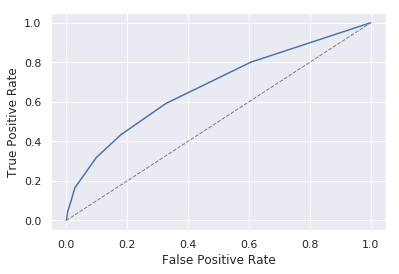

In [35]:
#Lets use matplotlib to plot a ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [38]:
#The crossed line represents a 50%/50% chance of right answer. The blue line is your model's precision.
#Well, our model is here, but we have to use it, right? Lets put some Python code to use it and predict if a flight would delay or not!
#I'll try to comment the code explaining what I understand of it so that it become clear to somebody who's not very into python or programming.

#def creates a function, that function will predict if the flight will delay or not.
#We give that function some arguments, their names are self-explanatory.
def predict_delay(departure_date_time, origin, destination):
    #Here we import some functions to deal with date and time.
    from datetime import datetime

    #Here we try to get information from the departure_date_time.
    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)

    #This is the information already with separate variables for each one of them
    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour

    #Here we just transform the origin and destination to uppercase. Ex.: sdu to SDU.
    origin = origin.upper()
    destination = destination.upper()

    #Now we populate the data to create the database. To do that we create a dictionary like the one bellow.
    #That dictionary (called input) will be converted into a DataFrame and passed to our model.
    input = [{'MONTH': month,
              'DAY': day,
              'DAY_OF_WEEK': day_of_week,
              'CRS_DEP_TIME': hour,
              'ORIGIN_ATL': 1 if origin == 'ATL' else 0,
              'ORIGIN_DTW': 1 if origin == 'DTW' else 0,
              'ORIGIN_JFK': 1 if origin == 'JFK' else 0,
              'ORIGIN_MSP': 1 if origin == 'MSP' else 0,
              'ORIGIN_SEA': 1 if origin == 'SEA' else 0,
              'DEST_ATL': 1 if destination == 'ATL' else 0,
              'DEST_DTW': 1 if destination == 'DTW' else 0,
              'DEST_JFK': 1 if destination == 'JFK' else 0,
              'DEST_MSP': 1 if destination == 'MSP' else 0,
              'DEST_SEA': 1 if destination == 'SEA' else 0 }]

    #Now we tell our function to return to the user the following function "model.predict_proba", 
    #and it will return a probability of that flight being delayed using our machine learning model.
    return model.predict_proba(pd.DataFrame(input))[0][0]

In [39]:
#Lets test our python script! 
predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL')

0.6

In [40]:
#We got a 60% chance of our flight at day 1 of month 10 of year 2018, with estimated departure time 21:45h, from JFK to ATL, being delayed.
#Lets now check the probability for the same flight but on the next day:
predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL')

0.8

In [41]:
#Well, looks really better. Lets find out now the probability for another flight, on the same day, but on morning.
predict_delay('2/10/2018 10:00:00', 'ATL', 'SEA')

1.0

(0.0, 1.0)

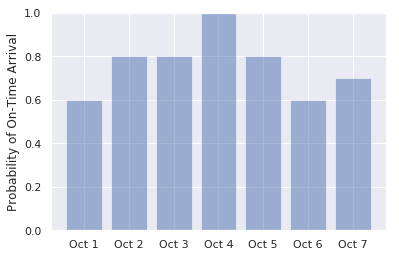

In [42]:
#100%! That's awesome. 
#Now lets say we want to fly from JFK to ATL on the 21:45h flight, lets take a view at what day, from Oct 1 to Oct 7, would
#be the best for us. We can do this creating a graph using our model and some python code.

import numpy as np

#The labels are the X labels on our graph. The Y will be the delay % chance on that day.
labels = ('Oct 1', 'Oct 2', 'Oct 3', 'Oct 4', 'Oct 5', 'Oct 6', 'Oct 7')

#Here we get a list of delay % chance using our model and save it on the "values" list.
values = (predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('3/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('4/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('5/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('6/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('7/10/2018 21:45:00', 'JFK', 'ATL'))

#Here we create a list of values from 0 to the labels lenght (7 days)
alabels = np.arange(len(labels))

#Here we plot the graph, insert the values and labels, etc.
#Here we use plt.bar to plot the graph. "alabels" are the " values, "values" are the Y values (predicted from our model).
plt.bar(alabels, values, align='center', alpha=0.5)
#Here we define the labels of our x values ("Oct 1, Oct 2, etc") and our x values
plt.xticks(alabels, labels)
#Here we just define the Y label
plt.ylabel('Probability of On-Time Arrival')
#Here we specify that we want our Y values being shown from 0 to 1 on our graph.
plt.ylim((0.0, 1.0))

(0.0, 1.0)

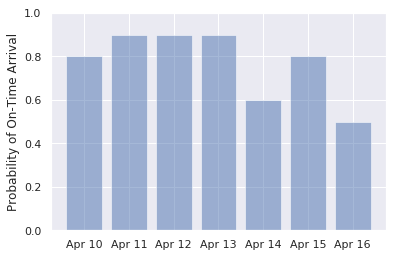

In [43]:
#Looks like Oct 4 is the best day! Lets try that with more flights on other days?
#Lets try a flight from JFK to MSP, 13:00h, from Apr 10 to Apr 16:

import numpy as np

labels = ('Apr 10', 'Apr 11', 'Apr 12', 'Apr 13', 'Apr 14', 'Apr 15', 'Apr 16')
values = (predict_delay('10/4/2018 21:45:00', 'JFK', 'MSP'),
          predict_delay('11/4/2018 21:45:00', 'JFK', 'MSP'),
          predict_delay('12/4/2018 21:45:00', 'JFK', 'MSP'),
          predict_delay('13/4/2018 21:45:00', 'JFK', 'MSP'),
          predict_delay('14/4/2018 21:45:00', 'JFK', 'MSP'),
          predict_delay('15/4/2018 21:45:00', 'JFK', 'MSP'),
          predict_delay('15/4/2018 21:45:00', 'JFK', 'MSP'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))


(0.0, 1.0)

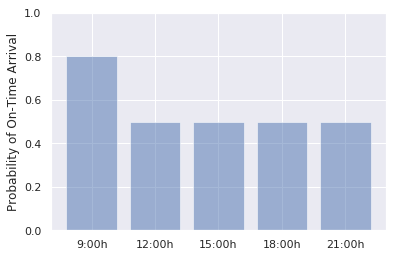

In [45]:
#Now, Let's try a more different one, from SEA to ATL, on Jan 30, but on multiple hours: 9:00h, 12:00h, 15:00h, 18:00h and 21:00h.

import numpy as np

labels = ('9:00h', '12:00h', '15:00h', '18:00h', '21:00h')
values = (predict_delay('30/1/2018 09:00:00', 'SEA', 'ATL'),
          predict_delay('30/1/2018 12:00:00', 'SEA', 'ATL'),
          predict_delay('30/1/2018 15:00:00', 'SEA', 'ATL'),
          predict_delay('30/1/2018 18:00:00', 'SEA', 'ATL'),
          predict_delay('30/1/2018 21:00:00', 'SEA', 'ATL'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))


In [ ]:
#That's it! We've created together our first model and tested it on flights! Hope my comments helped you.
#Wish you (and myself) the best luck on that road. The highest of the fives, Ricardo Macedo Ianelli. 